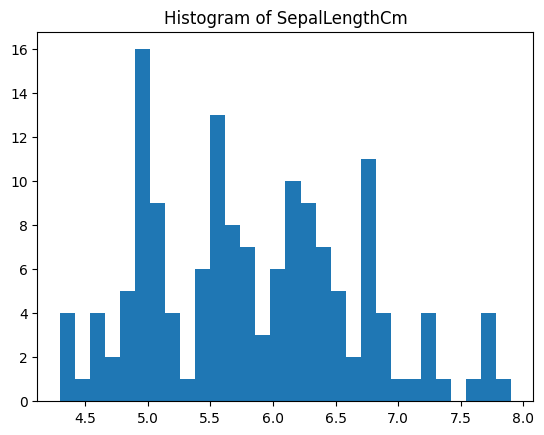

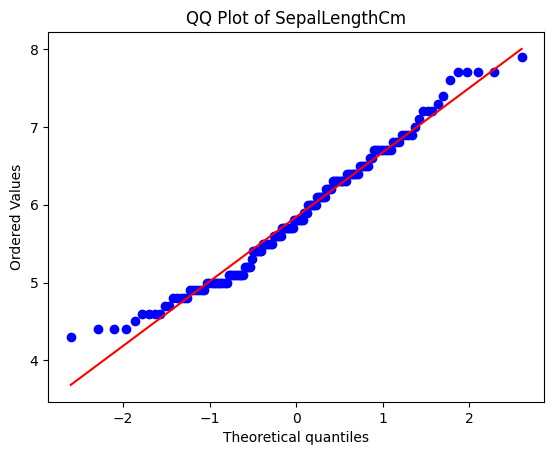

Shapiro-Wilk test: statistic=0.976, p-value=0.010
Kolmogorov-Smirnov test: statistic=1.000, p-value=0.000
SepalLengthCm does not appear to be normally distributed.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, shapiro, kstest
from scipy.special import boxcox


# Load the Iris dataset
data = pd.read_csv('Iris.csv')

# Select a feature (e.g., sepal length)
feature = 'SepalLengthCm'

# Explore the distribution
plt.hist(data[feature], bins=30)
plt.title(f'Histogram of {feature}')
plt.show()

# QQ plot
stats.probplot(data[feature], plot=plt)
plt.title(f'QQ Plot of {feature}')
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_pval = shapiro(data[feature])
print(f'Shapiro-Wilk test: statistic={shapiro_stat:.3f}, p-value={shapiro_pval:.3f}')

# Kolmogorov-Smirnov test
kstest_stat, kstest_pval = kstest(data[feature], 'norm')
print(f'Kolmogorov-Smirnov test: statistic={kstest_stat:.3f}, p-value={kstest_pval:.3f}')

# Check for normality
if shapiro_pval > 0.05 and kstest_pval > 0.05:
    print(f'{feature} appears to be normally distributed.')
else:
    print(f'{feature} does not appear to be normally distributed.')

# Apply Box-Cox transformation if necessary
#transformed_data, lambda_ = boxcox(data[feature], lambda_value)
lambda_value = 0.2  # You can adjust this value
transformed_data = boxcox(data[feature], lambda_value)[0]
# Check if transformed_data is a scalar
if not isinstance(transformed_data, (np.ndarray, pd.Series)):
    transformed_data = np.array([transformed_data])